<img src="../images/numerical_derivative_schemes.png" width="30%">

**Problem Statement:**
- Numerical Solution of Heat Conduction in an Aluminum Rod

**Objective:**
- Analyze the temperature distribution within the rod under various boundary and initial conditions using a numerical approach.

**Methodology:**
- **Discretization:** Divide the rod into small cells using the Finite Difference Method (FDM).
- **Approximation:** Employ the FDM scheme to approximate the heat conduction equation for each cell.
- **Implementation:** Develop a numerical solution algorithm with Python and NumPy.
- **Visualization:** Visualize the temperature distribution within the rod over time.


<img src="../images/heat_eq1.png" width="30%">

## Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
length = 10  # length of rod
sim_time = 10
k = 0.89 # for aluminium

# Boundary conditions
l_bc = 100 
r_bc = 200

In [3]:
dx = 0.1
x_vector = np.linspace(0, length, int(length/dx))
x_vector

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [4]:
dt = 0.0001
t_vector = np.linspace(0, sim_time, int(sim_time/dt))
t_vector.shape

(100000,)

In [5]:
# Initial condition
# u(t, x) -> u depends from t and x

u = np.zeros([len(t_vector), len(x_vector)])
u.shape  # 100k time steps, 100 space steps

(100000, 100)

In [6]:
u[:, 0] = l_bc
u[:, 99] = r_bc # u[:, -1] = r_bc also works

In [7]:
u

array([[100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       ...,
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.]])

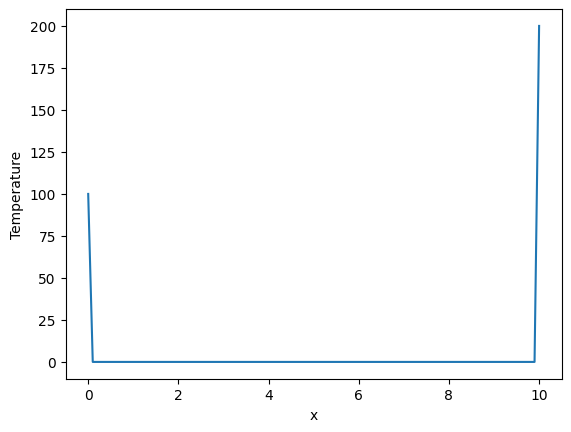

In [8]:
plt.plot(x_vector, u[0])
plt.ylabel('Temperature')
plt.xlabel('x')
plt.show()

## Calculation

In [9]:
for t in range(1, len(t_vector) - 1):
    for x in range(1, len(x_vector) - 1):
        u[t + 1, x] = ((k * (dt / dx**2)) * (u[t, x + 1] - 2 * u[t, x] + u[t, x - 1])) + u[t, x]

## Visualisation and Animation

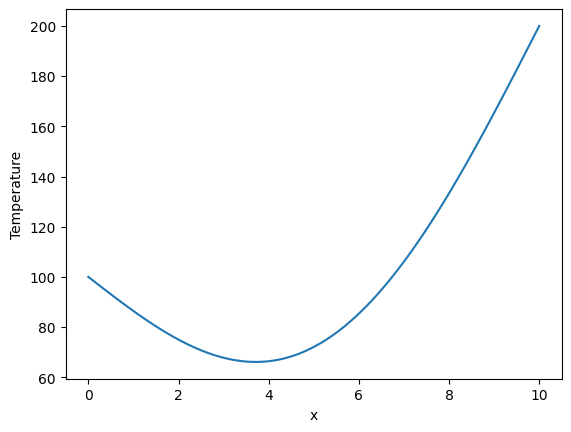

In [10]:
plt.plot(x_vector, u[len(u)-1, :])
plt.ylabel('Temperature')
plt.xlabel('x')
plt.show()

In [11]:
# %matplotlib notebook
# from matplotlib.animation import FuncAnimation
# import matplotlib.pyplot as plt

# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 100  
# plt.rcParams['animation.embed_limit'] = 50.0  # Set the limit to 50 MB
# plt.ioff()

# fig, ax = plt.subplots()
# line, = ax.plot(x_vector, u[0, :], '-')

# def update(frame):
#     line.set_ydata(u[frame, :])
#     return line,

# # Store the FuncAnimation instance in a variable

# ## Skip every 100th frame
# skip_frames = 100

# ani = FuncAnimation(fig, update, frames=range(0, len(t_vector), skip_frames), blit=True)
# plt.ylabel('Temperature')
# plt.xlabel('x')

# # Display the animation
# ani


In [12]:
# ani.save('1d_heat_anim.gif', writer='pillow', fps=50)